In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


Variables explained:
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

In [38]:
data = {'train' : pd.DataFrame(),
        'test'  : pd.DataFrame()}

train_filepath = "/kaggle/input/playground-series-s4e2/train.csv"
data['train'] = pd.read_csv(train_filepath, index_col='id')

test_filepath = "/kaggle/input/playground-series-s4e2/test.csv"
data['test'] = pd.read_csv(test_filepath, index_col='id')

data['train']

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [39]:
data['test']

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation


Create BMI and plot it on graph.

BMI = weight / height^2

In [40]:
BMI = {'train' : pd.DataFrame(),
      'test' : pd.DataFrame()}

BMI['train'] = pd.DataFrame(index = data['train'].index, columns = ['BMI', 'NObeyesdad'])
BMI['test'] = pd.DataFrame(index = data['test'].index, columns = ['BMI'])

BMI['train'].NObeyesdad = data['train'].NObeyesdad
BMI['train'].BMI = data['train'].Weight / (data['train'].Height ** 2)

BMI['test'].BMI = data['test'].Weight / (data['test'].Height ** 2)

BMI

{'train':              BMI           NObeyesdad
 id                                   
 0      28.259565  Overweight_Level_II
 1      23.422091        Normal_Weight
 2      17.126706  Insufficient_Weight
 3      44.855798     Obesity_Type_III
 4      25.599151  Overweight_Level_II
 ...          ...                  ...
 20753  36.587084      Obesity_Type_II
 20754  17.099278  Insufficient_Weight
 20755  31.889841      Obesity_Type_II
 20756  28.899693  Overweight_Level_II
 20757  35.800157      Obesity_Type_II
 
 [20758 rows x 2 columns],
 'test':              BMI
 id              
 20758  35.315411
 20759  25.781250
 20760  41.324115
 20761  42.976937
 20762  39.584143
 ...          ...
 34593  26.333478
 34594  24.524346
 34595  17.652091
 34596  20.195092
 34597  36.836204
 
 [13840 rows x 1 columns]}

<Axes: title={'center': 'Average BMI per weight class'}, xlabel='BMI', ylabel='NObeyesdad'>

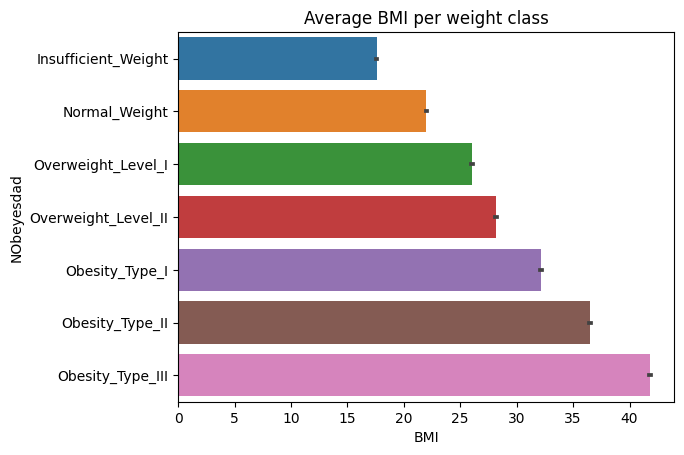

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

order= ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

plt.title("Average BMI per weight class")
sns.barplot(x=BMI['train'].BMI, y=BMI['train'].NObeyesdad, order = order)

<Axes: title={'center': 'BMI observation per group'}, xlabel='BMI', ylabel='NObeyesdad'>

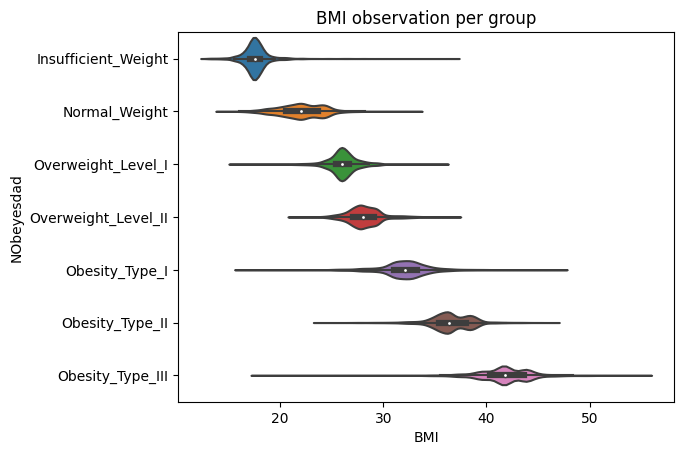

In [42]:
plt.title("BMI observation per group")

sns.violinplot(x=BMI['train'].BMI, y=BMI['train'].NObeyesdad, order = order)

In [43]:
for dataset in ['train', 'test']:
    data[dataset].insert(4, "BMI", BMI[dataset].BMI)
        
data['test']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,35.315411,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,25.781250,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,41.324115,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,42.976937,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,39.584143,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,26.333478,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,24.524346,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,17.652091,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation


We have some non-numeric variables

In [44]:
for column in data['train'].columns:
    if column in ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
        continue
    print(data['train'][column].value_counts())
    print()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

FAVC
yes    18982
no      1776
Name: count, dtype: int64

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

SMOKE
no     20513
yes      245
Name: count, dtype: int64

SCC
no     20071
yes      687
Name: count, dtype: int64

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64



We should convert string class variables into discreet variables

Map family_history_with_overweight, FAVC, SMOKE, SCC 'yes' -> 1 and 'no' -> 0

In [45]:
variables = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', ]

def yes_no(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

for variable in variables:
    for dataset in data.values():
        dataset[variable] = dataset[variable].apply(yes_no)

data['train']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,28.259565,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,23.422091,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,17.126706,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,44.855798,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,25.599151,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,36.587084,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,17.099278,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,31.889841,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [46]:
data['test']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,35.315411,1,1,2.938616,3.000000,Sometimes,0,2.825629,0,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,25.781250,1,1,2.000000,1.000000,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,41.324115,1,1,3.000000,3.000000,Sometimes,0,2.621877,0,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,42.976937,1,1,2.000000,2.977909,Sometimes,0,2.786417,0,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,39.584143,1,1,3.000000,3.000000,Sometimes,0,2.653531,0,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,26.333478,1,0,2.813234,3.000000,Sometimes,0,1.000000,0,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,24.524346,0,1,3.000000,3.000000,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,17.652091,0,1,3.000000,2.273740,Frequently,0,2.000000,0,1.949840,1.000000,Sometimes,Public_Transportation


Lets focus on CAEC now

In [47]:
data['train'].CAEC.unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [48]:
from sklearn.preprocessing import label_binarize

CAEC = {'train': pd.DataFrame(),
        'test' : pd.DataFrame()}

columns = ['CAEC_' + element for element in data['train'].CAEC.unique()]

CAEC['train'] = pd.DataFrame(label_binarize(data['train'].CAEC, classes = columns),
                             columns = columns,
                             index = data['train'].index)

CAEC['test'] = pd.DataFrame(label_binarize(data['test'].CAEC, classes = columns),
                            columns = columns,
                            index = data['test'].index)

CAEC

{'train':        CAEC_Sometimes  CAEC_Frequently  CAEC_no  CAEC_Always
 id                                                          
 0                   0                0        0            0
 1                   0                0        0            0
 2                   0                0        0            0
 3                   0                0        0            0
 4                   0                0        0            0
 ...               ...              ...      ...          ...
 20753               0                0        0            0
 20754               0                0        0            0
 20755               0                0        0            0
 20756               0                0        0            0
 20757               0                0        0            0
 
 [20758 rows x 4 columns],
 'test':        CAEC_Sometimes  CAEC_Frequently  CAEC_no  CAEC_Always
 id                                                          
 20758               0  

Lets divide the CAEC column into discret variables:
    CAEC_Sometimes
    CAEC_Frequently
    CAEC_Always
    CAEC_no

Replacing CAEC with new discret columns

In [49]:
data['train'].drop("CAEC", inplace = True, axis='columns')
data['test'].drop("CAEC", inplace = True, axis='columns')

print('CAEC droped')

CAEC droped


In [50]:
for key, dataset in CAEC.items():
    for column_name, column_data in dataset.items():
        data[key].insert(9, column_name, column_data)

print("CAEC binarized inserted")

CAEC binarized inserted


In [51]:
data['test']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,CAEC_no,CAEC_Frequently,CAEC_Sometimes,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,35.315411,1,1,2.938616,3.000000,0,0,0,0,0,2.825629,0,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,25.781250,1,1,2.000000,1.000000,0,0,0,0,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,41.324115,1,1,3.000000,3.000000,0,0,0,0,0,2.621877,0,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,42.976937,1,1,2.000000,2.977909,0,0,0,0,0,2.786417,0,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,39.584143,1,1,3.000000,3.000000,0,0,0,0,0,2.653531,0,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,26.333478,1,0,2.813234,3.000000,0,0,0,0,0,1.000000,0,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,24.524346,0,1,3.000000,3.000000,0,0,0,0,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,17.652091,0,1,3.000000,2.273740,0,0,0,0,0,2.000000,0,1.949840,1.000000,Sometimes,Public_Transportation


In [52]:
data['train']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,CAEC_Frequently,CAEC_Sometimes,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,28.259565,1,1,2.000000,2.983297,0,...,0,0,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,23.422091,1,1,2.000000,3.000000,0,...,0,0,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,17.126706,1,1,1.880534,1.411685,0,...,0,0,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,44.855798,1,1,3.000000,3.000000,0,...,0,0,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,25.599151,1,1,2.679664,1.971472,0,...,0,0,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,36.587084,1,1,2.919584,3.000000,0,...,0,0,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,17.099278,0,1,3.000000,4.000000,0,...,0,0,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,31.889841,1,1,2.407817,3.000000,0,...,0,0,0,2.000000,0,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


Transforming CALC into separate discret variables

In [53]:
data['train'].CALC.value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [54]:
CALC = {'train': pd.DataFrame(),
        'test' : pd.DataFrame()}

columns = ['CALC_' + element for element in data['train'].CALC.unique()]

CALC['train'] = pd.DataFrame(label_binarize(data['train'].CALC, classes = columns),
                             columns = columns,
                             index = data['train'].index)

CALC['train'] = pd.concat([CALC['train'], pd.DataFrame(np.zeros([CALC['train'].shape[0], 1]), index = CALC['train'].index, columns = ['CALC_Always'])], axis=1)

columns = ['CALC_' + element for element in data['test'].CALC.unique()]

CALC['test'] = pd.DataFrame(label_binarize(data['test'].CALC, classes = columns),
                            columns = columns,
                            index = data['test'].index)

CALC

{'train':        CALC_Sometimes  CALC_no  CALC_Frequently  CALC_Always
 id                                                          
 0                   0        0                0          0.0
 1                   0        0                0          0.0
 2                   0        0                0          0.0
 3                   0        0                0          0.0
 4                   0        0                0          0.0
 ...               ...      ...              ...          ...
 20753               0        0                0          0.0
 20754               0        0                0          0.0
 20755               0        0                0          0.0
 20756               0        0                0          0.0
 20757               0        0                0          0.0
 
 [20758 rows x 4 columns],
 'test':        CALC_Sometimes  CALC_no  CALC_Frequently  CALC_Always
 id                                                          
 20758               0  

In [55]:
data['train'].drop("CALC", inplace = True, axis='columns')
data['test'].drop("CALC", inplace = True, axis='columns')

print('CALC droped')

CALC droped


In [56]:
for key, dataset in CALC.items():
    for column_name, column_data in dataset.items():
        data[key].insert(16, column_name, column_data)

print("CALC binarized variables inserted")

CALC binarized variables inserted


In [57]:
data['test']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,SMOKE,CH2O,SCC,CALC_Always,CALC_Frequently,CALC_no,CALC_Sometimes,FAF,TUE,MTRANS
id,,,,,,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,35.315411,1,1,2.938616,3.000000,0,...,0,2.825629,0,0,0,0,0,0.855400,0.000000,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,25.781250,1,1,2.000000,1.000000,0,...,0,3.000000,0,0,0,0,0,1.000000,0.000000,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,41.324115,1,1,3.000000,3.000000,0,...,0,2.621877,0,0,0,0,0,0.000000,0.250502,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,42.976937,1,1,2.000000,2.977909,0,...,0,2.786417,0,0,0,0,0,0.094851,0.000000,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,39.584143,1,1,3.000000,3.000000,0,...,0,2.653531,0,0,0,0,0,0.000000,0.741069,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,26.333478,1,0,2.813234,3.000000,0,...,0,1.000000,0,0,0,0,0,0.807076,0.778632,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,24.524346,0,1,3.000000,3.000000,0,...,0,2.000000,0,0,0,0,0,0.000000,0.000000,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,17.652091,0,1,3.000000,2.273740,0,...,0,2.000000,0,0,0,0,0,1.949840,1.000000,Public_Transportation


In [58]:
data['train']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,CH2O,SCC,CALC_Always,CALC_Frequently,CALC_no,CALC_Sometimes,FAF,TUE,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,28.259565,1,1,2.000000,2.983297,0,...,2.763573,0,0.0,0,0,0,0.000000,0.976473,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,23.422091,1,1,2.000000,3.000000,0,...,2.000000,0,0.0,0,0,0,1.000000,1.000000,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,17.126706,1,1,1.880534,1.411685,0,...,1.910378,0,0.0,0,0,0,0.866045,1.673584,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,44.855798,1,1,3.000000,3.000000,0,...,1.674061,0,0.0,0,0,0,1.467863,0.780199,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,25.599151,1,1,2.679664,1.971472,0,...,1.979848,0,0.0,0,0,0,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,36.587084,1,1,2.919584,3.000000,0,...,2.151809,0,0.0,0,0,0,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,17.099278,0,1,3.000000,4.000000,0,...,1.000000,0,0.0,0,0,0,2.000000,1.000000,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,31.889841,1,1,2.407817,3.000000,0,...,2.000000,0,0.0,0,0,0,1.158040,1.198439,Public_Transportation,Obesity_Type_II


Replace MTRANS with discreet variables

In [59]:
data['train'].MTRANS.value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [60]:
data['train'].MTRANS.unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [61]:
from sklearn.preprocessing import label_binarize

MTRANS = {'train': pd.DataFrame(),
        'test' : pd.DataFrame()}

columns = data['train'].MTRANS.unique()

MTRANS['train'] = pd.DataFrame(label_binarize(data['train'].MTRANS, classes = columns),
                               columns = columns,
                               index = data['train'].index)

MTRANS['test'] = pd.DataFrame(label_binarize(data['test'].MTRANS, classes = columns),
                              columns = columns,
                              index = data['test'].index)

MTRANS

{'train':        Public_Transportation  Automobile  Walking  Motorbike  Bike
 id                                                                
 0                          1           0        0          0     0
 1                          0           1        0          0     0
 2                          1           0        0          0     0
 3                          1           0        0          0     0
 4                          1           0        0          0     0
 ...                      ...         ...      ...        ...   ...
 20753                      1           0        0          0     0
 20754                      1           0        0          0     0
 20755                      1           0        0          0     0
 20756                      0           1        0          0     0
 20757                      1           0        0          0     0
 
 [20758 rows x 5 columns],
 'test':        Public_Transportation  Automobile  Walking  Motorbike  Bike
 i

In [62]:
data['train'].drop("MTRANS", inplace = True, axis='columns')
data['test'].drop("MTRANS", inplace = True, axis='columns')

print('MTRANS droped')

MTRANS droped


In [63]:
for key, dataset in MTRANS.items():
    for column_name, column_data in dataset.items():
        data[key].insert(22, column_name, column_data)

print('MTRANS inserted')

MTRANS inserted


In [64]:
data['train']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,CALC_no,CALC_Sometimes,FAF,TUE,Bike,Motorbike,Walking,Automobile,Public_Transportation,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,28.259565,1,1,2.000000,2.983297,0,...,0,0,0.000000,0.976473,0,0,0,0,1,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,23.422091,1,1,2.000000,3.000000,0,...,0,0,1.000000,1.000000,0,0,0,1,0,Normal_Weight
2,Female,18.000000,1.711460,50.165754,17.126706,1,1,1.880534,1.411685,0,...,0,0,0.866045,1.673584,0,0,0,0,1,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,44.855798,1,1,3.000000,3.000000,0,...,0,0,1.467863,0.780199,0,0,0,0,1,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,25.599151,1,1,2.679664,1.971472,0,...,0,0,1.967973,0.931721,0,0,0,0,1,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,36.587084,1,1,2.919584,3.000000,0,...,0,0,1.330519,0.196680,0,0,0,0,1,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,17.099278,0,1,3.000000,4.000000,0,...,0,0,2.000000,1.000000,0,0,0,0,1,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,31.889841,1,1,2.407817,3.000000,0,...,0,0,1.158040,1.198439,0,0,0,0,1,Obesity_Type_II


Replace NObeyesdad with numerical variable

In [65]:
data['train'].NObeyesdad.unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [66]:
from sklearn.preprocessing import OrdinalEncoder

NObeyesdad = {'train': pd.DataFrame()}
    
columns = data['train'].NObeyesdad.unique()

NOb_enc = OrdinalEncoder()

data['train'].NObeyesdad = NOb_enc.fit_transform( np.reshape(data['train'].NObeyesdad, [-1, 1]))

data['train']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,CALC_no,CALC_Sometimes,FAF,TUE,Bike,Motorbike,Walking,Automobile,Public_Transportation,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,28.259565,1,1,2.000000,2.983297,0,...,0,0,0.000000,0.976473,0,0,0,0,1,6.0
1,Female,18.000000,1.560000,57.000000,23.422091,1,1,2.000000,3.000000,0,...,0,0,1.000000,1.000000,0,0,0,1,0,1.0
2,Female,18.000000,1.711460,50.165754,17.126706,1,1,1.880534,1.411685,0,...,0,0,0.866045,1.673584,0,0,0,0,1,0.0
3,Female,20.952737,1.710730,131.274851,44.855798,1,1,3.000000,3.000000,0,...,0,0,1.467863,0.780199,0,0,0,0,1,4.0
4,Male,31.641081,1.914186,93.798055,25.599151,1,1,2.679664,1.971472,0,...,0,0,1.967973,0.931721,0,0,0,0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,36.587084,1,1,2.919584,3.000000,0,...,0,0,1.330519,0.196680,0,0,0,0,1,3.0
20754,Male,18.000000,1.710000,50.000000,17.099278,0,1,3.000000,4.000000,0,...,0,0,2.000000,1.000000,0,0,0,0,1,0.0
20755,Male,20.101026,1.819557,105.580491,31.889841,1,1,2.407817,3.000000,0,...,0,0,1.158040,1.198439,0,0,0,0,1,3.0


Change Gender into 0 or 1
Male = 0
Female = 1

In [67]:
def gender(sex):
    if sex == 'Male':
        return 0
    else:
        return 1

for key, dataset in data.items():
    dataset['Gender'] = dataset['Gender'].apply(gender)

data['train']

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,CALC_no,CALC_Sometimes,FAF,TUE,Bike,Motorbike,Walking,Automobile,Public_Transportation,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,0,24.443011,1.699998,81.669950,28.259565,1,1,2.000000,2.983297,0,...,0,0,0.000000,0.976473,0,0,0,0,1,6.0
1,1,18.000000,1.560000,57.000000,23.422091,1,1,2.000000,3.000000,0,...,0,0,1.000000,1.000000,0,0,0,1,0,1.0
2,1,18.000000,1.711460,50.165754,17.126706,1,1,1.880534,1.411685,0,...,0,0,0.866045,1.673584,0,0,0,0,1,0.0
3,1,20.952737,1.710730,131.274851,44.855798,1,1,3.000000,3.000000,0,...,0,0,1.467863,0.780199,0,0,0,0,1,4.0
4,0,31.641081,1.914186,93.798055,25.599151,1,1,2.679664,1.971472,0,...,0,0,1.967973,0.931721,0,0,0,0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,25.137087,1.766626,114.187096,36.587084,1,1,2.919584,3.000000,0,...,0,0,1.330519,0.196680,0,0,0,0,1,3.0
20754,0,18.000000,1.710000,50.000000,17.099278,0,1,3.000000,4.000000,0,...,0,0,2.000000,1.000000,0,0,0,0,1,0.0
20755,0,20.101026,1.819557,105.580491,31.889841,1,1,2.407817,3.000000,0,...,0,0,1.158040,1.198439,0,0,0,0,1,3.0


Divide train data into train and test data for internal test

In [68]:
from sklearn.model_selection import train_test_split
feature_col = data['train'].columns[:-1]
target_col = data['train'].columns[-1:]

feature_data = data['train'][feature_col]
target_data = data['train'][target_col]
target_data

,NObeyesdad
id,
0,6.0
1,1.0
2,0.0
3,4.0
4,6.0
...,...
20753,3.0
20754,0.0
20755,3.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, random_state = 1,test_size = 0.2)
X_train

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Always,...,CALC_Frequently,CALC_no,CALC_Sometimes,FAF,TUE,Bike,Motorbike,Walking,Automobile,Public_Transportation
id,,,,,,,,,,,,,,,,,,,,,
18207,0,33.000000,1.830000,99.000000,29.561946,1,1,2.000000,1.0,0,...,0,0,0,1.000000,0.000000,0,0,0,0,1
12325,0,18.000000,1.600000,50.000000,19.531250,0,1,2.000000,3.0,0,...,0,0,0,1.000000,1.000000,0,0,0,0,1
2680,0,25.526746,1.793174,118.134898,36.739509,1,1,2.955300,3.0,0,...,0,0,0,0.631565,1.011983,0,0,0,0,1
728,0,23.000000,1.706082,51.881263,17.824228,1,1,2.748243,3.0,0,...,0,0,0,0.906843,1.593704,0,0,0,1,0
19760,1,17.000000,1.550000,59.000000,24.557752,0,1,1.000000,1.0,0,...,0,0,0,1.000000,2.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1,18.000000,1.660000,57.000000,20.685150,0,1,2.000000,3.0,0,...,0,0,0,0.000000,1.000000,0,0,0,0,1
17289,1,26.000000,1.621245,111.933152,42.585469,1,1,3.000000,3.0,0,...,0,0,0,0.000000,0.534769,0,0,0,0,1
5192,0,26.000000,1.700000,70.000000,24.221453,0,0,2.000000,3.0,0,...,0,0,0,3.000000,0.000000,0,0,0,0,1


Test GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

leaf_nodes = [7, 10, 25, 50, 100, 200, 500]

columns = y_train.columns

index = ['score_' + str(leaf) for leaf in leaf_nodes]

scores = pd.DataFrame(columns = columns, index = index)

scores

,NObeyesdad
score_7,NaN
score_10,NaN
score_25,NaN
score_50,NaN
score_100,NaN
score_200,NaN
score_500,NaN


In [79]:
for column in columns:
    for i in range(len(leaf_nodes)):
        model = GradientBoostingClassifier(max_leaf_nodes = leaf_nodes[i], random_state = 1)
        model.fit(X_train, y_train[column])
        scores.loc[index[i], column] = model.score(X_test, y_test[column])
    
scores

,NObeyesdad
score_7,0.895231
score_10,0.897881
score_25,0.897881
score_50,0.897881
score_100,0.897881
score_200,0.897881
score_500,0.897881


Lets do full prediction with 10 max_leaf_nodes

In [80]:
predicts = pd.DataFrame(columns = columns, index = data['test'].index)

for column in columns:
    model = GradientBoostingClassifier(max_leaf_nodes = 10, random_state = 1)
    model.fit(feature_data, target_data[column])
    predicts[column] = model.predict(data['test'])
    
predicts

,NObeyesdad
id,
20758,3.0
20759,5.0
20760,4.0
20761,2.0
20762,4.0
...,...
34593,6.0
34594,1.0
34595,0.0


In [81]:
predicts.value_counts()

NObeyesdad
4.0           2627
3.0           2121
1.0           2102
2.0           2052
6.0           1758
0.0           1732
5.0           1448
Name: count, dtype: int64

In [82]:
predicts_inversed = pd.DataFrame(NOb_enc.inverse_transform(predicts), index = predicts.index, columns = ['NObeyesdad'])
predicts_inversed

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Normal_Weight
34595,Insufficient_Weight


<Axes: xlabel='NObeyesdad', ylabel='count'>

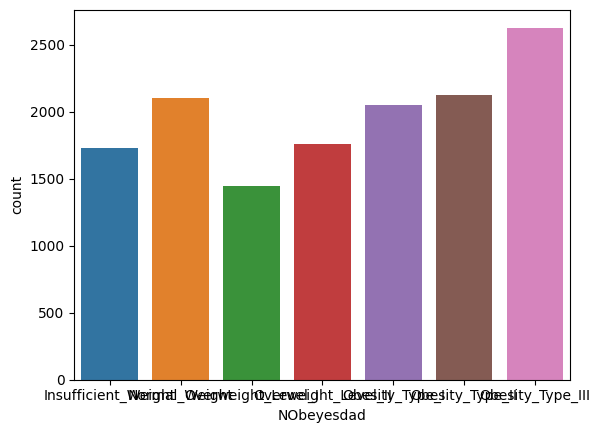

In [90]:
sns.countplot(data = predicts_inversed, x = 'NObeyesdad', order = order)

In [84]:
predicts.to_csv('submission.csv')
print('result done')

result done
